# Statisitcal data analysis system

## First steps and guide
To use this system ....

## Import of main depndencies
Lorem ipsum ....

In [1]:
import pandas as pd
import scipy as scp
import copy
from IPython.core.display import HTML
from Core.FeaturesModel import FeaturesModel
from functools import reduce
from IPython.display import clear_output
from ipywidgets import interact, interactive

import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from UI.ConverterUI import ConverterUI

# from scipy.stats import spearmanr
DATA_DIR = "data/"

## Raw data represetation
Description goes here....

In [2]:
data = pd.read_csv(DATA_DIR + 'seps_utf.csv', ';')
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))]
data = data.drop(['Оценка', 'Группа'], 1)
data = data.dropna()
scales_manager = FeaturesModel(data, 'html')

scales_manager.raw_df

,Содержание дисциплины соответствовало заявленному в программе дисциплины,Место дисциплины в программе обучения обосновано,Учебная нагрузка дисциплины посильная,Уровень нагрузки в ходе обучения равномерный,Занятия проводились согласно расписанию,Доступ к материалам дисциплины предоставлялся вовремя,О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме,Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания],Перед изучением дисциплины [был ли у Вас соответствующий практический опыт],"Оцените, пожалуйста, [приблизительный уровень Вашего присутствия на занятиях (в %)]",...,При изложении материала прослеживались связи [между этой и другими дисциплинами программы обучения],Преподаватель динамично реагировал на вопросы и потребности студентов,Готовы ли Вы охарактеризовать поведение уравновешенным и отношение к студентам объективным [говоря о преподавателе],Методы оценивания были понятны и обоснованы?,Вы получали вовремя результаты оценивания?,Давал ли преподаватель полезную обратную связь по результатам оценивания?,Методические указания содержали полезные сведения,Требуемый объем работ,Преподаватель эффективно помогал в решении возникавших проблем,Практические/лабораторные задания Вы выполняли
0,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
1,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
2,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Да,Нет,60-74,...,Весьма эпизодически,Да,Нет,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Иногда,самостоятельно
3,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,31-59,...,"Да, регулярно",Да,Да,Да,Да,Я не спрашивал,"Однозначно, да",посильный,Всегда,с небольшой помощью
4,Полностью согласен,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,75-89,...,"Да, регулярно",Да,Да,Да,Да,Иногда баллы за электронные лабораторные работ...,"Однозначно, да",посильный,Всегда,с небольшой помощью
5,Согласен,Не определился,Согласен,Согласен,Согласен,Согласен,Согласен,Нет,Нет,75-89,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,с небольшой помощью
6,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
7,Полностью согласен,Не определился,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,как команда
8,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
9,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,самостоятельно


In [3]:
display(HTML(scales_manager.f_features_names()))

In [4]:
display(HTML(str(scales_manager.features[0])))

In [6]:
# display(HTML(str(list(map(lambda x: str(x), scales_manager.features)))))
features_list = list(map(lambda x: str(x), scales_manager.features))
features_html = reduce(lambda x, y: x+y, features_list)
display(HTML(features_html))

Полностью согласен   1.1
Согласен   1.2
Не определился   1.3


## Self descriptive statistics
Describes feature itself, by representing basic statistic metrics for scale. Scale is a 

In [3]:
from Core.FeaturesScales.DescriptiveStatisticsCalculators.NominalCalculator import NominalCalculator
from Core.FeaturesScales.DescriptiveStatisticsCalculators.OrdinalCalculator import OrdinalCalculator
from Core.FeaturesScales.DescriptiveStatisticsCalculators.IntervalCalculator import IntervalCalculator

def my_calc_mode(self, observation_dict):
    return {k: v for (k, v) in observation_dict.items() if v == max(observation_dict.values())}

NominalCalculator.calc_mode = my_calc_mode


Dropdown(description='Choose feature: ', layout=Layout(width='100%'), options=('Содержание дисциплины соответс…

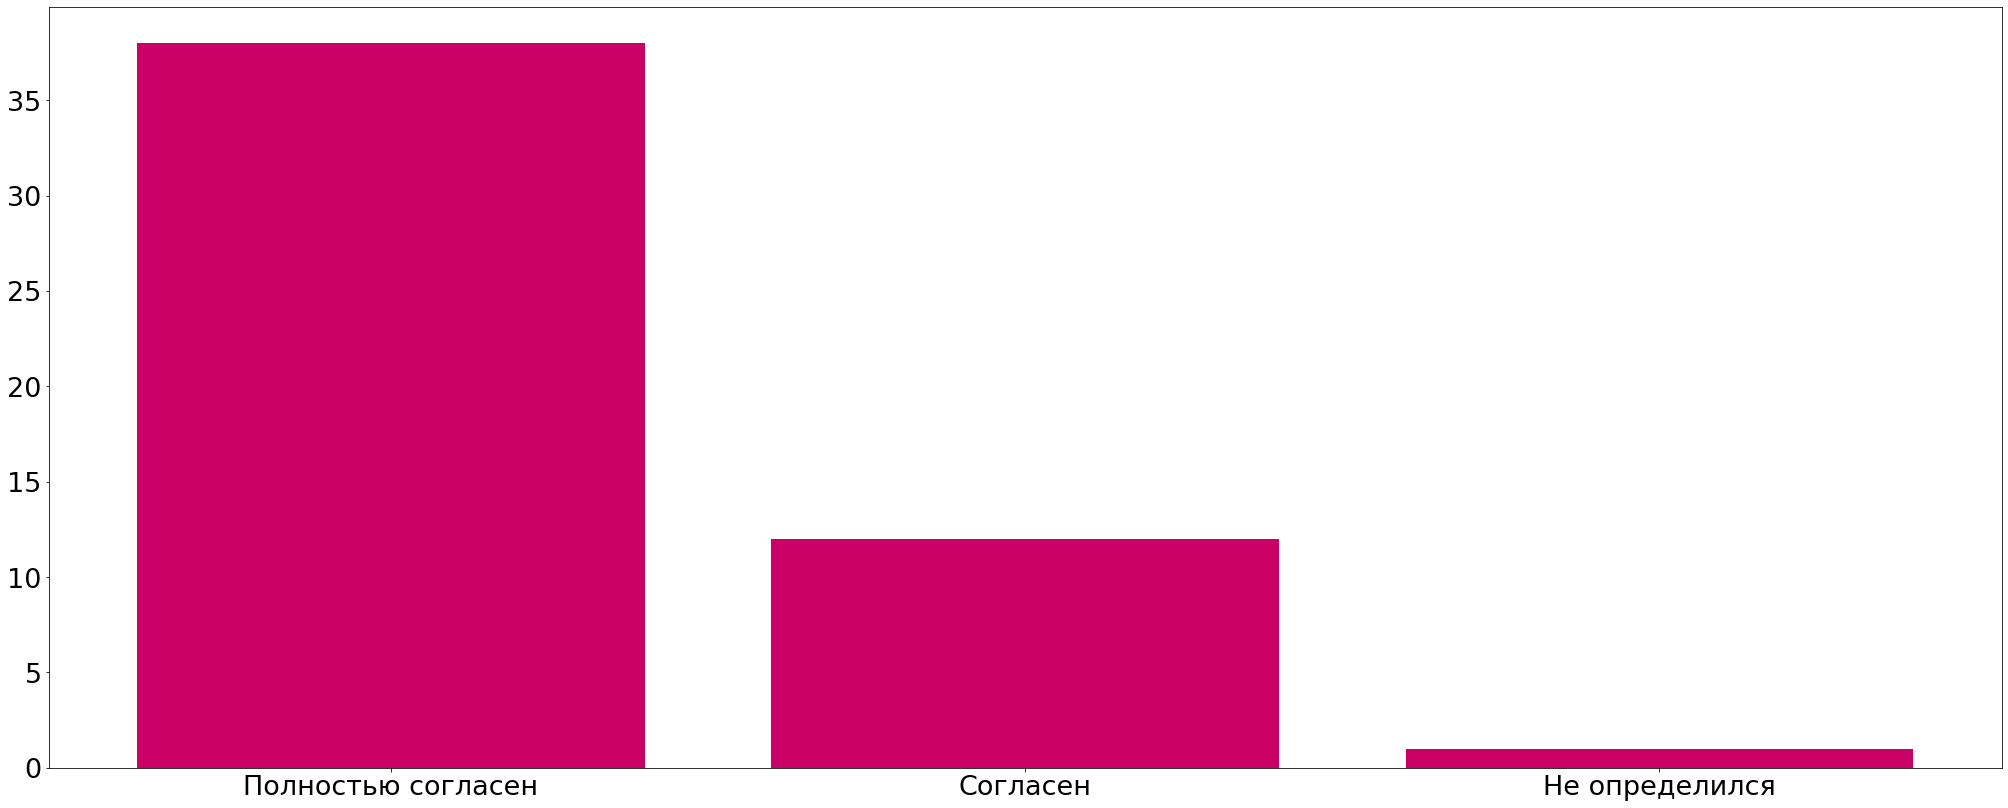

In [7]:
# print(scales_manager.features)
# display(HTML(scales_manager.features))
features_dropdown = widgets.Dropdown(
    options=scales_manager.raw_features_names(),
    value=scales_manager.raw_features_names()[0],
    description='Choose feature: ',
    disabled=False,
    style={'description_width': 'initial', 'width': '500px'},
    layout={'width':'100%'}
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(features_dropdown)
        display(HTML(str(scales_manager[change['new']].f_get_stat_info())))

features_dropdown.observe(on_change)
display(features_dropdown)
display(HTML(scales_manager.features[0].f_get_stat_info()))

In [5]:
converter_ui = ConverterUI(scales_manager)
converter_ui.ui()

Dropdown(description='Choose feature: ', index=2, layout=Layout(width='100%'), options=('Содержание дисциплины…

Dropdown(description='Change scale from <b><u>Nominal</u></b> to:', layout=Layout(height='37px', width='100%')…

VBox()

Button(description='Convert scale', disabled=True, style=ButtonStyle())

In [5]:
w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction', 'Division'],
    value='Addition',
    description='Task:',
)
def on_change(change):
    print(f"type {change['type']} name: {change['name']}")
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

Dropdown(description='Task:', options=('Addition', 'Multiplication', 'Subtraction', 'Division'), value='Additi…

type change name: _property_lock
type change name: label
type change name: value
changed to Multiplication
type change name: index
type change name: _property_lock
